# Yolo Model and Sorts

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install deep_sort_realtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 100.3 MB/s eta 0:00:0000:0100:01


In [4]:
pip install -U ultralytics supervision opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import yaml
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort

# Dataset paths
DATA_DIR = '/kaggle/input/traffic-dataset/traffic_wala_dataset'
TRAIN_IMG = os.path.join(DATA_DIR, 'train/images')
VAL_IMG = os.path.join(DATA_DIR, 'valid/images')


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
data = {
    'train': TRAIN_IMG,
    'val': VAL_IMG,
    'nc': 1,                    # Only 1 class: 'vehicle'
    'names': ['vehicle']       # Generic class name
}
with open('data.yaml', 'w') as f:
    yaml.dump(data, f)


In [ ]:
model = YOLO('yolov8s.pt')  # or 'yolov8n.pt' for faster training
model.train(data='data.yaml', epochs=50, imgsz=640, batch=16, project='runs/vehicle_count', name='exp1')


100%|██████████| 21.5M/21.5M [00:00<00:00, 415MB/s]


Ultralytics 8.3.154 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, p

100%|██████████| 755k/755k [00:00<00:00, 128MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 259MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 8.1±3.1 MB/s, size: 57.5 KB)


train: Scanning /kaggle/input/traffic-dataset/traffic_wala_dataset/train/labels... 536 images, 0 backgrounds, 0 corrupt: 100%|██████████| 536/536 [00:03<00:00, 174.47it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/traffic-dataset/traffic_wala_dataset/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5.8±1.8 MB/s, size: 57.6 KB)


val: Scanning /kaggle/input/traffic-dataset/traffic_wala_dataset/valid/labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 150.48it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/traffic-dataset/traffic_wala_dataset/valid is not writeable, cache not saved.


Plotting labels to runs/vehicle_count/exp1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/vehicle_count/exp1
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.11G      1.205      1.138      1.031         93        640: 100%|██████████| 34/34 [00:11<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all         90        937      0.854      0.848      0.918      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.15G      1.117     0.7383          1        114        640: 100%|██████████| 34/34 [00:10<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]

                   all         90        937      0.836      0.879      0.929      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.18G      1.149     0.7663      1.025        127        640: 100%|██████████| 34/34 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all         90        937      0.834      0.855      0.898      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.22G      1.188     0.7528      1.035        137        640: 100%|██████████| 34/34 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all         90        937      0.801      0.712      0.788      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.26G      1.133     0.6935      1.012        163        640: 100%|██████████| 34/34 [00:10<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all         90        937      0.843      0.835      0.911      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.29G      1.132     0.6612       1.01        202        640: 100%|██████████| 34/34 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]

                   all         90        937      0.817      0.847      0.878       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.33G      1.066     0.6438     0.9921         81        640: 100%|██████████| 34/34 [00:10<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]

                   all         90        937      0.877      0.905      0.949      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.37G      1.064     0.6305     0.9929        158        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]

                   all         90        937      0.873       0.88      0.949      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       4.4G      1.041     0.6208     0.9914         81        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]

                   all         90        937      0.874      0.923      0.955      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.44G      1.056     0.6158     0.9808        117        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]

                   all         90        937      0.844      0.909      0.944       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.47G      1.024     0.5964     0.9739        100        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]

                   all         90        937      0.899       0.89       0.95      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.51G     0.9978     0.5678     0.9683        102        640: 100%|██████████| 34/34 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all         90        937      0.871      0.942      0.956       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.55G      1.033     0.6028     0.9865         90        640: 100%|██████████| 34/34 [00:10<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all         90        937      0.891      0.882      0.949      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.58G      1.041     0.5923     0.9811         87        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]

                   all         90        937      0.875      0.906      0.956      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.62G      1.006     0.5855     0.9763         61        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all         90        937      0.902      0.919      0.966      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.66G      1.004     0.5626     0.9647        122        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]

                   all         90        937       0.88      0.921      0.958      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.69G      1.005     0.5648     0.9635         85        640: 100%|██████████| 34/34 [00:10<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]

                   all         90        937      0.911       0.92      0.968      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.73G     0.9782     0.5429     0.9544         96        640: 100%|██████████| 34/34 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         90        937      0.903      0.912      0.971      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.76G     0.9783     0.5377     0.9644        172        640: 100%|██████████| 34/34 [00:10<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all         90        937      0.882      0.912      0.959      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.98G     0.9675     0.5267     0.9545        135        640: 100%|██████████| 34/34 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         90        937      0.903      0.925      0.964      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.02G     0.9581      0.517     0.9575        132        640: 100%|██████████| 34/34 [00:10<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]

                   all         90        937      0.924      0.914       0.97      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.05G     0.9694     0.5184     0.9564         69        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all         90        937      0.889      0.917      0.966      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.09G     0.9533     0.5225     0.9599        116        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]

                   all         90        937      0.901      0.931      0.972      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.12G     0.9445     0.5115     0.9531         58        640: 100%|██████████| 34/34 [00:10<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]

                   all         90        937      0.866      0.954      0.973       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.16G     0.9346     0.5024     0.9393        145        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]

                   all         90        937        0.9      0.919      0.968       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       5.2G     0.9331     0.5029     0.9462        242        640: 100%|██████████| 34/34 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]

                   all         90        937       0.91      0.922      0.967      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       5.4G     0.9134     0.5016     0.9406        168        640: 100%|██████████| 34/34 [00:10<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]

                   all         90        937      0.895      0.931      0.968      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.44G     0.9148     0.4968     0.9383         88        640: 100%|██████████| 34/34 [00:10<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]

                   all         90        937      0.927      0.902      0.971      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.47G     0.9202     0.4965     0.9387         88        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all         90        937      0.895      0.929      0.968      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.51G     0.9172     0.4938     0.9436         96        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all         90        937       0.91      0.927      0.974      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.55G     0.9104      0.478     0.9286        180        640: 100%|██████████| 34/34 [00:10<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]

                   all         90        937      0.858      0.908      0.949        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.58G     0.9092     0.4872     0.9356        124        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all         90        937      0.915      0.911      0.971      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.62G     0.8838     0.4677     0.9326         79        640: 100%|██████████| 34/34 [00:10<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]

                   all         90        937      0.921      0.927      0.972      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.65G     0.8834     0.4656     0.9297        122        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]

                   all         90        937      0.915      0.918      0.964      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.82G     0.8807     0.4612     0.9284        114        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]

                   all         90        937      0.915      0.922      0.967       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.86G     0.8673     0.4531     0.9332        127        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]

                   all         90        937      0.906      0.939      0.968      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.89G     0.8612     0.4528     0.9197         93        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all         90        937      0.921      0.918      0.969      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.93G     0.8472     0.4485      0.922         62        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]

                   all         90        937      0.925      0.919      0.971      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.96G     0.8566     0.4468     0.9171        110        640: 100%|██████████| 34/34 [00:10<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]

                   all         90        937      0.916      0.925      0.972       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.14G     0.8525     0.4398     0.9194        123        640: 100%|██████████| 34/34 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]

                   all         90        937      0.916      0.934      0.974      0.743


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.18G     0.8384     0.4202     0.9179         78        640: 100%|██████████| 34/34 [00:10<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]

                   all         90        937      0.912      0.935      0.973      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.22G     0.8288     0.4155     0.9126         94        640: 100%|██████████| 34/34 [00:10<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all         90        937       0.92      0.932      0.977      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.25G     0.8204     0.4079     0.9139        108        640: 100%|██████████| 34/34 [00:10<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]

                   all         90        937      0.929      0.924      0.976      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.29G     0.8119     0.4003     0.9091         75        640: 100%|██████████| 34/34 [00:10<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all         90        937      0.932      0.916      0.978      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.32G     0.8145     0.4068      0.913        109        640: 100%|██████████| 34/34 [00:10<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         90        937      0.927      0.918      0.976      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.36G     0.8046     0.3965     0.9107         30        640: 100%|██████████| 34/34 [00:10<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all         90        937      0.926      0.925      0.974      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.62G     0.7862     0.3874     0.9017         93        640: 100%|██████████| 34/34 [00:10<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all         90        937      0.934      0.924      0.977      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.66G     0.7759     0.3789     0.8937         47        640: 100%|██████████| 34/34 [00:10<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]

                   all         90        937       0.94      0.921       0.98      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.69G     0.7719     0.3759     0.8998        100        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all         90        937      0.925      0.935      0.979      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.73G     0.7634     0.3732      0.895        112        640: 100%|██████████| 34/34 [00:10<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]

                   all         90        937      0.932      0.921      0.979      0.749



50 epochs completed in 0.159 hours.
Optimizer stripped from runs/vehicle_count/exp1/weights/last.pt, 22.5MB
Optimizer stripped from runs/vehicle_count/exp1/weights/best.pt, 22.5MB

Validating runs/vehicle_count/exp1/weights/best.pt...
Ultralytics 8.3.154 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         90        937      0.932      0.921      0.979      0.749
Speed: 0.2ms preprocess, 5.4ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/vehicle_count/exp1


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b225e144450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Yolo + DeepSort

In [ ]:
best_model = YOLO('runs/vehicle_count/exp1/weights/best.pt')
tracker = DeepSort(max_age=30, n_init=3)


In [ ]:
line_y = 300  
vehicle_count = 0
track_history = {}


frames = sorted(os.listdir(VAL_IMG))
for img_file in frames:
    frame = cv2.imread(os.path.join(VAL_IMG, img_file))
    results = best_model.predict(frame, imgsz=640)[0]
    
    dets = []
    for box, conf in zip(results.boxes.xyxy, results.boxes.conf):
        x1, y1, x2, y2 = map(int, box)
        dets.append(([x1, y1, x2-x1, y2-y1], conf.item(), 'vehicle'))  

    tracks = tracker.update_tracks(dets, frame=frame)

    for t in tracks:
        if not t.is_confirmed(): continue
        tid = t.track_id
        x1, y1, x2, y2 = t.to_ltrb()
        cx = int((x1 + x2) / 2)
        cy = int((y1 + y2) / 2)

        if tid not in track_history:
            track_history[tid] = cy
        if track_history[tid] < line_y <= cy:  
            vehicle_count += 1
        track_history[tid] = cy
        
print("Total Vehicles Counted:", vehicle_count)


0: 640x640 23 vehicles, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 27 vehicles, 8.5ms
Speed: 1.5ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 28 vehicles, 8.5ms
Speed: 1.6ms preprocess, 8.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 31 vehicles, 8.6ms
Speed: 1.6ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 32 vehicles, 8.5ms
Speed: 1.6ms preprocess, 8.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 32 vehicles, 8.5ms
Speed: 2.1ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 33 vehicles, 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 33 vehicles, 8.5ms
Speed: 1.6ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (


0: 640x640 6 vehicles, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


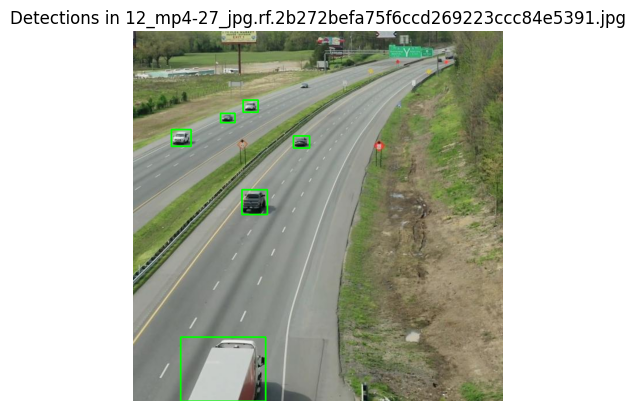


0: 640x640 4 vehicles, 8.6ms
Speed: 1.6ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


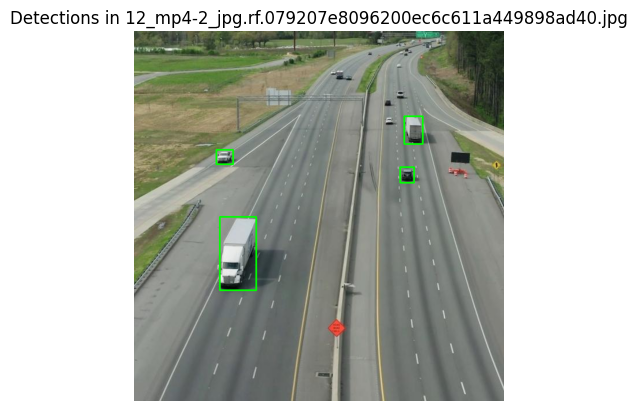


0: 640x640 7 vehicles, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


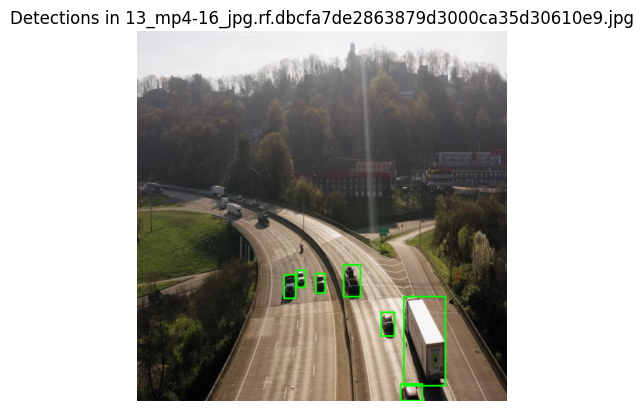


0: 640x640 8 vehicles, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


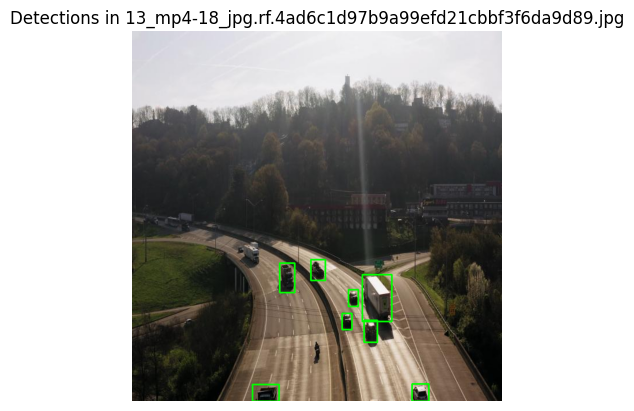


0: 640x640 7 vehicles, 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


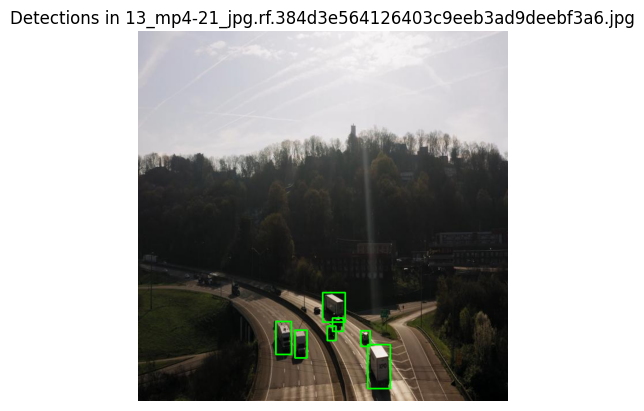

In [ ]:
import matplotlib.pyplot as plt

# Example: visualize 5 frames with boxes
for img_file in sorted(os.listdir(VAL_IMG))[:10]:  # change number if needed
    frame = cv2.imread(os.path.join(VAL_IMG, img_file))
    results = best_model.predict(frame, imgsz=640)[0]

    for box in results.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)  # green box

    # Convert BGR to RGB for matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.title(f"Detections in {img_file}")
    plt.axis('off')
    plt.show()


# Yolo + ByteTrack

In [ ]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
from supervision import ByteTrack, Detections, BoxAnnotator

# --- Configuration ---
IMAGE_DIR = "/kaggle/input/traffic-dataset/traffic_wala_dataset/valid/images"
SAVE_DIR = "tracked_images"
os.makedirs(SAVE_DIR, exist_ok=True)

model = YOLO("/kaggle/input/yolo-weights/pytorch/default/1/best.pt")

tracker = ByteTrack()
annotator = BoxAnnotator()

line_y = 300
vehicle_count = 0
track_history = {}  
counted_ids = set() 

image_files = sorted([
    f for f in os.listdir(IMAGE_DIR) 
    if f.lower().endswith(('.jpg', '.png', '.jpeg'))
])

for img_name in image_files:
    img_path = os.path.join(IMAGE_DIR, img_name)
    frame = cv2.imread(img_path)
    if frame is None:
        continue

    height, width = frame.shape[:2]
    
    results = model(frame, imgsz=640)[0]
    detections = Detections.from_ultralytics(results)
    
    tracks = tracker.update_with_detections(detections)
   
    labels = []
    for detection_idx in range(len(tracks)):
    
        tracker_id = tracks.tracker_id[detection_idx]
        class_id = tracks.class_id[detection_idx]
        confidence = tracks.confidence[detection_idx]
        x1, y1, x2, y2 = tracks.xyxy[detection_idx]
        
        cx = int((x1 + x2) / 2)
        cy = int((y1 + y2) / 2)
        
        if tracker_id not in track_history:
            track_history[tracker_id] = cy
        
        prev_y = track_history[tracker_id]
        if (prev_y < line_y) and (cy >= line_y) and (tracker_id not in counted_ids):
            vehicle_count += 1
            counted_ids.add(tracker_id)
        
        track_history[tracker_id] = cy
        
        
        labels.append(f"ID:{tracker_id} ({confidence:.2f})")
    
    tracks.labels = np.array(labels)
    
    annotated_frame = annotator.annotate(
        scene=frame.copy(),
        detections=tracks
    )
    
    cv2.line(annotated_frame, (0, line_y), (width, line_y), (0, 255, 0), 2)
    
    # Display vehicle count
    cv2.putText(annotated_frame, f"Vehicles: {vehicle_count}", (20, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Save annotated image
    out_path = os.path.join(SAVE_DIR, img_name)
    cv2.imwrite(out_path, annotated_frame)

print(f"✅ Processed {len(image_files)} images. Results saved to: {SAVE_DIR}")
print(f"🚗 Total Vehicles Counted: {vehicle_count}")


0: 640x640 23 vehicles, 8.4ms
Speed: 1.6ms preprocess, 8.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 27 vehicles, 8.4ms
Speed: 1.5ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 28 vehicles, 8.4ms
Speed: 1.6ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 31 vehicles, 8.4ms
Speed: 1.6ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 32 vehicles, 8.4ms
Speed: 1.4ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 32 vehicles, 8.4ms
Speed: 1.4ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 33 vehicles, 8.4ms
Speed: 1.5ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 33 vehicles, 8.4ms
Speed: 1.4ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (

In [ ]:
# --- CONFIGURATION ---
import torch
import torchvision
import cv2
import numpy as np
from ultralytics import YOLO
from supervision import ByteTrack, Detections
from tqdm import tqdm
from collections import defaultdict, deque
import time
import os

class Config:
    VIDEO_PATH = "/kaggle/input/video-test-data/traffic.mp4"
    MODEL_PATH = "/kaggle/input/yolo-weights/pytorch/default/1/best.pt" 
    OUTPUT_PATH = "/kaggle/working/output-YOLO-ByteTrack.mp4"
    CONF_THRESH = 0.5
    NUM_CLASSES = 2
    DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    DENSITY_THRESHOLDS = {
        'HEAVY': 8,
        'MEDIUM': 6,
        'LIGHT': 3
    }
    STOPPED_TIME_THRESH = 2.0
    STOPPED_PIXEL_THRESH = 5
    ROI_LINE_Y_PERCENT = 0.6
    PIXELS_PER_METER = 20


def load_model():
    model = YOLO(Config.MODEL_PATH)
    model.to(Config.DEVICE)
    return model

# --- MAIN SCRIPT ---
def main():
    config = Config()
    model = load_model()
    cap = cv2.VideoCapture(config.VIDEO_PATH)
    if not cap.isOpened():
        print(f"Error: Could not open video file at {config.VIDEO_PATH}")
        return

    W = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    H = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    FPS = cap.get(cv2.CAP_PROP_FPS)
    if FPS == 0: FPS = 30
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    out_vid = cv2.VideoWriter(config.OUTPUT_PATH, cv2.VideoWriter_fourcc(*"mp4v"), FPS, (W, H))

    tracker = ByteTrack()
    object_last_centers = {}
    track_positions = defaultdict(lambda: deque(maxlen=int(FPS * config.STOPPED_TIME_THRESH)))
    entry_count, exit_count = 0, 0

    for frame_idx in tqdm(range(total_frames), desc="Analyzing Traffic"):
        ret, frame = cap.read()
        if not ret: break

        results = model(frame, imgsz=640, device=Config.DEVICE, verbose=False)[0]
        detections = Detections.from_ultralytics(results)
        
        mask = (detections.confidence > config.CONF_THRESH) & (detections.class_id == 0)
        detections = detections[mask]
        
        tracks = tracker.update_with_detections(detections)
        
        visible_vehicle_count = 0
        current_frame_track_ids = set()
        roi_line_y_abs = int(config.ROI_LINE_Y_PERCENT * H)

    
        for detection_idx in range(len(tracks)):
         
            tracker_id = tracks.tracker_id[detection_idx]
            class_id = tracks.class_id[detection_idx]
            confidence = tracks.confidence[detection_idx]
            x1, y1, x2, y2 = tracks.xyxy[detection_idx]
            
           
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
            
            
            current_frame_track_ids.add(tracker_id)
            visible_vehicle_count += 1
            
            if tracker_id not in track_positions:
                track_positions[tracker_id] = deque(maxlen=int(FPS * config.STOPPED_TIME_THRESH))
            
            track_positions[tracker_id].append((cx, cy))
            
            speed_mps = 0.0
            if tracker_id in object_last_centers:
                prev_cx, prev_cy = object_last_centers[tracker_id]
                dist_pixels = np.hypot(cx - prev_cx, cy - prev_cy)
                if FPS > 0:
                    speed_mps = (dist_pixels * FPS) / config.PIXELS_PER_METER
            
            if tracker_id in object_last_centers:
                prev_cx, prev_cy = object_last_centers[tracker_id]
                if prev_cy < roi_line_y_abs <= cy: 
                    entry_count += 1
                elif prev_cy > roi_line_y_abs >= cy: 
                    exit_count += 1
            
            object_last_centers[tracker_id] = (cx, cy)
            
            is_stopped = False
            if len(track_positions[tracker_id]) == track_positions[tracker_id].maxlen:
                start_pos = track_positions[tracker_id][0]
                displacement = np.linalg.norm(np.array(start_pos) - np.array((cx, cy)))
                if displacement < config.STOPPED_PIXEL_THRESH:
                    is_stopped = True
            
            box_color = (0, 0, 255)  
            label_text = f"ID:{tracker_id} {speed_mps:.1f}m/s"
            
            if is_stopped:
                box_color = (255, 0, 255)  
                cv2.putText(frame, "STOPPED", (x1, y2 + 20), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, box_color, 2)
            
            cv2.rectangle(frame, (x1, y1), (x2, y2), box_color, 2)
            cv2.putText(frame, label_text, (x1, y1 - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, box_color, 2)

        for tid in list(object_last_centers):
            if tid not in current_frame_track_ids:
                del object_last_centers[tid]
                if tid in track_positions:
                    del track_positions[tid]
        
        overlay = frame.copy()
        cv2.rectangle(overlay, (0, 0), (W, 100), (0, 0, 0), -1)
        frame = cv2.addWeighted(overlay, 0.6, frame, 0.4, 0)
        
        cv2.putText(frame, f"IN: {entry_count}  OUT: {exit_count}", 
                    (20, 35), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        cv2.putText(frame, f"Live Count: {visible_vehicle_count}", 
                    (20, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        
        if visible_vehicle_count > config.DENSITY_THRESHOLDS['HEAVY']:
            density_level, density_color = "HEAVY", (0, 0, 255)
        elif visible_vehicle_count > config.DENSITY_THRESHOLDS['MEDIUM']:
            density_level, density_color = "MEDIUM", (0, 255, 255)
        else:
            density_level, density_color = "LIGHT", (0, 255, 0)
            
        density_text = f"Density: {density_level}"
        (w_text, h_text), _ = cv2.getTextSize(density_text, cv2.FONT_HERSHEY_SIMPLEX, 1.2, 3)
        cv2.putText(frame, density_text, (W - w_text - 120, 60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1.2, density_color, 3)

        out_vid.write(frame)

    cap.release()
    out_vid.release()
    cv2.destroyAllWindows()
    print(f"\n✅ Processing complete. Output video saved to: {config.OUTPUT_PATH}")

if __name__ == '__main__':
    main()

Analyzing Traffic: 100%|██████████| 900/900 [00:21<00:00, 41.35it/s]


✅ Processing complete. Output video saved to: /kaggle/working/output-YOLO-ByteTrack.mp4


# Yolo + BotSort

In [ ]:
import os
import cv2
import torch
import numpy as np
from ultralytics import YOLO
from tqdm import tqdm
from collections import defaultdict, deque

class Config:
    VIDEO_PATH = "/kaggle/input/video-test-data/traffic.mp4"
    MODEL_PATH = "/kaggle/input/yolo-weights/pytorch/default/1/best.pt"
    OUTPUT_PATH = "/kaggle/working/output_botsort_final.mp4"
    CONF_THRESH = 0.5
    ROI_LINE_Y_PERCENT = 0.6
    PIXELS_PER_METER = 20
    STOPPED_TIME_THRESH = 2.0  
    STOPPED_PIXEL_THRESH = 5    
    DENSITY_THRESHOLDS = {'HEAVY': 8, 'MEDIUM': 6, 'LIGHT': 3}
    TRACKER_CONFIG = "botsort.yaml"  

def main():
    cfg = Config()
    device = "cuda" if torch.cuda.is_available() else "cpu"
    
    model = YOLO(cfg.MODEL_PATH)
    
    cap = cv2.VideoCapture(cfg.VIDEO_PATH)
    if not cap.isOpened():
        print(f"Error: Could not open video file at {cfg.VIDEO_PATH}")
        return

    W = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    H = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    FPS = cap.get(cv2.CAP_PROP_FPS) or 30
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    out = cv2.VideoWriter(
        cfg.OUTPUT_PATH,
        cv2.VideoWriter_fourcc(*"mp4v"),
        FPS, (W, H)
    )
    
    object_centers = {}
    history = defaultdict(lambda: deque(maxlen=int(FPS * cfg.STOPPED_TIME_THRESH)))
    entry_count = exit_count = 0
    line_y = int(H * cfg.ROI_LINE_Y_PERCENT)
    
    for idx in tqdm(range(total_frames), desc="Processing Video"):
        ret, frame = cap.read()
        if not ret: 
            break
        
        results = model.track(
            source=frame,
            tracker=cfg.TRACKER_CONFIG,
            imgsz=640,
            conf=cfg.CONF_THRESH,
            device=device,
            persist=True,  
            verbose=False
        )[0]
        
        visible = 0
        current_ids = set()
        
        if results.boxes.id is not None:
           
            boxes = results.boxes.xyxy.cpu().numpy()
            track_ids = results.boxes.id.cpu().numpy().astype(int)
            scores = results.boxes.conf.cpu().numpy()
            class_ids = results.boxes.cls.cpu().numpy().astype(int)
            
           
            for box, track_id, score, class_id in zip(boxes, track_ids, scores, class_ids):
                if class_id != 0:
                    continue
                    
                
                x1, y1, x2, y2 = map(int, box)
                cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
                
                visible += 1
                current_ids.add(track_id)
                
                if track_id not in history:
                    history[track_id] = deque(maxlen=int(FPS * cfg.STOPPED_TIME_THRESH))
                
              
                history[track_id].append((cx, cy))
                
                speed = 0.0
                if track_id in object_centers:
                    px, py = object_centers[track_id]
                    dpx = np.hypot(cx - px, cy - py)
                    speed = (dpx * FPS) / cfg.PIXELS_PER_METER
                
                if track_id in object_centers:
                    _, py = object_centers[track_id]
                    if py < line_y <= cy: 
                        entry_count += 1
                    elif py > line_y >= cy: 
                        exit_count += 1
                
                object_centers[track_id] = (cx, cy)
                
                stopped = False
                if len(history[track_id]) == history[track_id].maxlen:
                    sx, sy = history[track_id][0]
                    if np.hypot(cx - sx, cy - sy) < cfg.STOPPED_PIXEL_THRESH:
                        stopped = True
                
                color = (0, 0, 255) if not stopped else (255, 0, 255)  
                cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
                cv2.putText(frame, f"ID:{track_id} {speed:.1f}m/s",
                            (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
                
                if stopped:
                    cv2.putText(frame, "STOPPED", (x1, y2 + 20),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
        
        for tid in list(object_centers):
            if tid not in current_ids:
                del object_centers[tid]
                if tid in history: 
                    del history[tid]
        
        panel = frame.copy()
        cv2.rectangle(panel, (0, 0), (W, 80), (0, 0, 0), -1)
        frame = cv2.addWeighted(panel, 0.6, frame, 0.4, 0)
        
        cv2.putText(frame, f"IN:{entry_count}  OUT:{exit_count}  LIVE:{visible}",
                    (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        
        if visible > cfg.DENSITY_THRESHOLDS['HEAVY']:
            lvl, col = "HEAVY", (0, 0, 255)
        elif visible > cfg.DENSITY_THRESHOLDS['MEDIUM']:
            lvl, col = "MEDIUM", (0, 255, 255)
        else:
            lvl, col = "LIGHT", (0, 255, 0)
        
        density_text = f"DENSITY:{lvl}"
        (text_width, text_height), _ = cv2.getTextSize(density_text, cv2.FONT_HERSHEY_SIMPLEX, 1.2, 3)
        
        x_position = W - text_width - 20  
        
        cv2.putText(frame, density_text, (x_position, 60),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.2, col, 3)

        out.write(frame)

    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print(f"\n✅ Done. Final video saved at {cfg.OUTPUT_PATH}")

if __name__ == "__main__":
    main()

Processing Video: 100%|██████████| 900/900 [00:41<00:00, 21.61it/s]


✅ Done. Final video saved at /kaggle/working/output_botsort_final.mp4


# Thank You!